In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed
import pandas as pd
from mpl_toolkits import mplot3d
from matplotlib.patches import FancyArrowPatch,Rectangle,Circle
from mpl_toolkits.mplot3d import art3d

plt.rcParams["figure.figsize"] = [8, 8]

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt,linspace,array,arange,meshgrid

from scipy.integrate import quad,dblquad

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


In [17]:
%%html
<style>
    li.thm {
        margin: 10px 0;
    }
</style>

# One-minute Review

Compute the following line integral. 
 $$\int_C \left(x y e^{-x y}-e^{-x y}\right)\,dx + x^2 e^{-x y}\,dy$$ where $C$ is oriented curve below. 

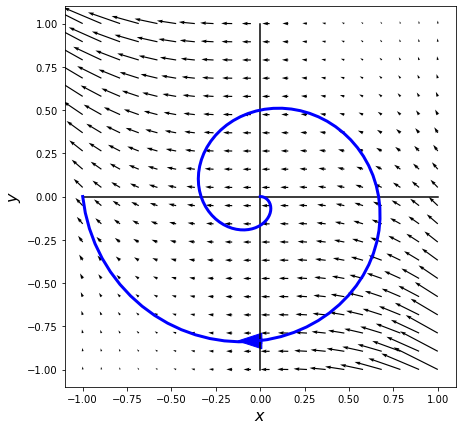

In [3]:
x = y = np.linspace(-1,1,20)
x,y = np.meshgrid(x,y)
plt.figure(figsize=(7,7))
plt.quiver(x,y,x*y*exp(-x*y)-exp(-x*y),exp(-x*y)*x**2);
for c in 'xy':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
    getattr(plt.gca(),f"set_{c}label")(f"${c}$",size=16)
t= np.linspace(0,1,100)    
# plt.plot(2 - (2+sqrt(2))*t,sqrt(2)*t,'r',lw=3);
plt.arrow(0.01,-.835,-.001,0,width=.03,color='b')
plt.plot([0,0],[-1,1],'k')
plt.plot([-1,1],[0,0],'k')
plt.plot((1-t)*cos(t*6*pi/2-pi),(1-t)*sin(t*6*pi/2-pi),'b',lw=3);

<p style="padding-bottom:40%;"> </p>

# Lecture 20 - Green's Theorem

  - Objectives
      - Know the statement.
      - Know the ingredients.
      - Scalar curl
      - Divergence in 2D

  - Resources
    - Content
      - Stewart: §16.5
      - New Strang:  
        - [§6.4](https://openstax.org/books/calculus-volume-3/pages/6-4-greens-theorem)

    - Practice
      - Mooculus: [Green's Theorem](https://ximera.osu.edu/mooculus/calculus3/greensTheorem/titlePage)
    - Extras 
      - CalcBLUE: [Green's](https://www.youtube.com/watch?v=AUriw3-RoBo&list=PL8erL0pXF3JYCn8Xukv0DqVIXtXJbOqdo&index=37) 

<p style="padding-bottom:50%;"> </p>

<img src="swirlyD.png" style="float: left; right: 100px;" width="300px">

Generally, $\int_C \vec F\cdot d\vec r$ computes the "flow of $\vec F$ along $C$". 

In the event that $C$ encloses a region $\mathcal{D}$ (we say $C=\partial D$, the "boundary of $D$), we use the symbole $\oint$ for the line integral, and we have a powerful theorem:

<p style="padding-bottom:40%;"> </p>

<div style="width-max: 300px">
    <img src="swirlyD.png" width="300px" style="float: left;" />
    
# Green's Theorem


$$\oint_{\partial D} P\,dx + Q\,dy = \iint_\mathcal{D} \left(\frac{\partial Q}{\partial x} - \frac{\partial P}{\partial y} \right)\,dA$$ 

where:  
<ul>
  <li class="thm"> $D$ is a (simply connected) region in the plane,</li>

  <li class="thm"> $\partial D$ is an counterclockwise-oriented, simple, closed curve forming the boundary of $\mathcal D$, and </li>

  <li class="thm"> $$\vec F(x,y) =  \langle P(x,y),Q(x,y) \rangle$$ is a continuously differentiable vector field. </li>
</ul>
    </div>

<p style="padding-bottom:40%;"> </p>

### Justification

It is sufficient to show the two identities

$$\oint_C P\,dx = \iint_\mathcal D -\partial_y P \,dA$$

$$\oint_C Q\,dy = \iint_\mathcal D \partial_x Q \,dA$$

Consider only the first case and that $\mathcal D$ is the region 
\begin{align*}
g(x) &\leq  y \leq f(x) \\
a &\leq  x \leq b \\
\end{align*}

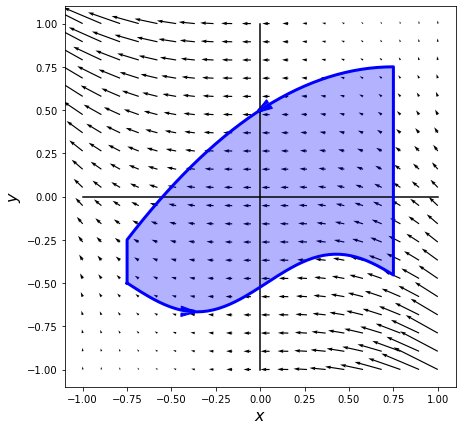

In [6]:
x = y = np.linspace(-1,1,20)
x,y = np.meshgrid(x,y)
plt.figure(figsize=(7,7))
plt.quiver(x,y,x*y*exp(-x*y)-exp(-x*y),exp(-x*y)*x**2);
for c in 'xy':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
    getattr(plt.gca(),f"set_{c}label")(f"${c}$",size=16)
t= np.linspace(0,1,100)    
# plt.plot(2 - (2+sqrt(2))*t,sqrt(2)*t,'r',lw=3);
plt.plot([0,0],[-1,1],'k')
plt.plot([-1,1],[0,0],'k')
xs = np.concatenate((t*3/2 - 3/4,(1-t)*3/2 - 3/4,[-.75]))
ys = np.concatenate((0*t - sin(6*t)*1/6 - 1/2,0*t + 3/4 - t**2,[-1/2]))
for ti in (25,150):
    plt.arrow(xs[ti],ys[ti],(xs[ti+1]-xs[ti-1])/2,(ys[ti+1]-ys[ti-1])/2,width=.02,color='b',length_includes_head=True)
plt.fill(xs,ys,'b',lw=3,alpha=.3);
plt.plot(xs,ys,'b',lw=3,alpha=1);

# plt.plot((1-t)*cos(t*4*pi/2-pi),(1-t)*sin(t*4*pi/2-pi),'b',lw=3);
# plt.plot((1-t)*cos(t*6*pi/2-pi),(1-t)*sin(t*6*pi/2-pi),'b',lw=3);

<p style="padding-bottom:40%;"> </p>

# Examples

  1. Compute the line integral of $\vec F(x,y) =\langle (xy - y^2) , x^2\rangle$ on the triangular curve connecting $(0,0)$, $(2,0)$, and $(3,2)$ counterclockwise.

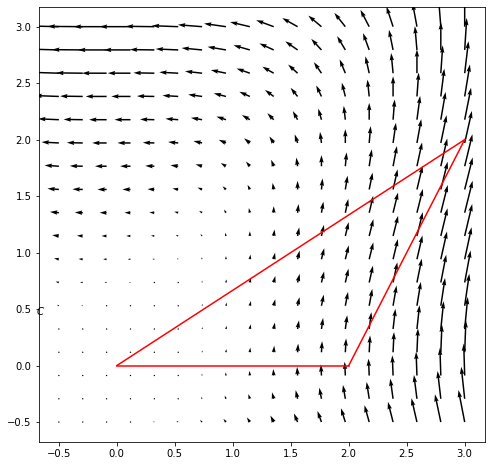

In [16]:
r1 = lambda t: np.array([2*t,0*t])
r2 = lambda t: np.array([2 + t, 2*t])
r3 = lambda t: np.array([3*t,2*t])
t = np.linspace(0,1,100)
plt.plot(*r1(t),'-r')
plt.plot(*r2(t),'-r')
plt.plot(*r3(t),'-r')
plt.text(-.7,.45,"$C$");
u = np.linspace(-1/2,3,18) 
v = np.linspace(-1/2,3,18)
x,y = np.meshgrid(u,v)
plt.quiver(x,y,y*x -y**2,x**2);


<p style="padding-bottom:40%;"> </p>

$$ \int_C \vec F\cdot d\vec r  = \int_0^2 \int_{3/2 y}^{2+ y/2} (2x - (x - 2y)) dx \,dy$$

To compute around the curve, we parameterize each leg. Call the bottom $C_1$, the right $C_2$, and the top $C_3$. 

$\displaystyle C_1: \vec r(t) = \langle t,0 \rangle$ for $0\leq t \leq 2$

$\displaystyle C_2: \vec r(t) = \langle 2 + t,2t \rangle$ for $0\leq t \leq 1$

$\displaystyle C_1: \vec r(t) = \langle 3 - 3t,2 - 2t \rangle$ for $0\leq t \leq 1$

Then compute each line integral $\int_a^b \vec F(\vec r(t))\cdot \vec r'(t)\,dt$ and add them up. 

$$\int_0^2 \vec F(t,0)\cdot \langle 1,0 \rangle dt + \int_0^1 \vec F(2 + t,2t)\cdot \langle 1,2 \rangle dt + \int_0^1 \vec F(3-3t,2-2t)\cdot \langle -3,-2 \rangle dt $$

Computed numerically, we get $6$ for both.

In [57]:
dblquad(lambda x,y: x + 2*y,0,2,lambda y:3/2*y,lambda y:2 + y/2)[0]

6.0

In [56]:
def F(x,y):
    return (x*y - y**2,x**2)

I1 = quad(lambda t: np.dot(F(t,0),(1,0)),0,2)[0]
I2 = quad(lambda t: np.dot(F(2 + t,2*t),(1,2)),0,1)[0]
I3 = quad(lambda t: np.dot(F(3 - 3*t,2 - 2*t),(-3,-2)),0,1)[0]

I1 + I2 + I3

6.0

<p style="padding-bottom:40%;"> </p>

### Area

Question: Can you find the surface area of Central Park's Jackie Onassis Reservoir if you cannot swim?

<p style="padding-bottom:40%;"> </p>

<p style="padding-bottom:40%;"> </p>

Answer: Sure. One just needs a GPS watch. 

Consider $C$ the ccw boundary of a region $\mathcal D$. then 

$$\oint_C x\, dy = \iint_\mathcal D 1\,dA = \text{Area}(\mathcal D) $$

![A picture of the Central Park reservoir with vector field overlay](reservoir.png)

<p style="padding-bottom:40%;"> </p>

### Area

Equivalently,

$$\text{Area}(\mathcal D) = \oint_{\partial \mathcal D} (-y)\,dx = \frac12 \oint_{\partial\mathcal D}x\,dy  -y\,dx $$

## Example

Let $\mathcal{R}$ be the rectangular region $[a,b]\times [c,d]$. Let $C$ be its counter-clockwise oriented boundary. Compute 

$$\oint_C \langle  0,x\rangle \cdot d\vec r$$

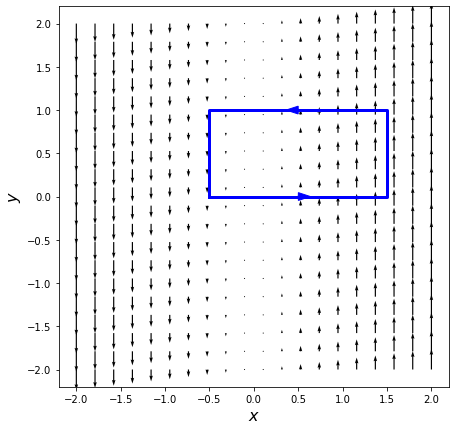

In [7]:
x = y = np.linspace(-2,2,20)
x,y = np.meshgrid(x,y)
plt.figure(figsize=(7,7))
plt.quiver(x,y,0,x);
for c in 'xy':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
    getattr(plt.gca(),f"set_{c}label")(f"${c}$",size=16)
t= np.linspace(0,1,100)    
plt.plot([-1/2,3/2,3/2,-1/2,-1/2],[0,0,1,1,0],'b',lw=3);
plt.arrow(1/2,0,.001,0,color='b',width=.03)
plt.arrow(1/2,1,-.001,0,color='b',width=.03);

<p style="padding-bottom:40%;"> </p>

![A picture of the Central Park reservoir with vector field overlay](reservoir.png)

See the [Reservoir Loop notebook](../extras/reservoir.ipynb) in the `extras` folder for details.

# Notes on a Theorem

#### When do the FTLI and Green's Theorem both apply?


$$\int_C \vec F\cdot d\vec r$$

  - $F$ is conservative.

  - $C$ is closed. 

<p style="padding-bottom:40%;"> </p>

#### Hole-y Domains

The "simply connected part of Green's is easily relaxed if we consider an "oriented boundary" properly.

![Domain with a hole traversed in two pieces](holey.png)

<p style="padding-bottom:40%;"> </p>

#### Hole-y Domains

The "simply connected part of Green's is easily relaxed if we consider an "oriented boundary" properly.

![Domain with a hole - boundary traversed in two pieces](holey2.png)

<p style="padding-bottom:40%;"> </p>

### Exercise

Let $C$ be the curve tracing the boundary of the unit square (corners at $(0,0)$, $(1,0)$, $(1,1)$, and $(0,1)$) oriented counterclockwise. 

Let $ \vec F(x,y) = \langle 3, -  \frac{x^2}{2}\rangle$. Compute $\displaystyle \oint_C \vec F\cdot d\vec r$. 

Which is faster? Direct computation or using Green's Theorem?

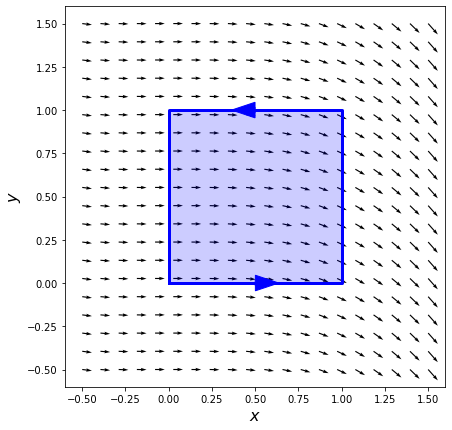

In [16]:
x = y = np.linspace(-1/2,3/2,20)
x,y = np.meshgrid(x,y)
plt.figure(figsize=(7,7))
plt.quiver(x,y,0*x + 1,-x**2/2);
for c in 'xy':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
    getattr(plt.gca(),f"set_{c}label")(f"${c}$",size=16)
t= np.linspace(0,1,100)    
plt.gca().set_aspect('equal')
plt.plot([0,1,1,0,0],[0,0,1,1,0],'b',lw=3);
plt.fill([0,1,1,0,0],[0,0,1,1,0],'b',alpha=.2);

plt.arrow(1/2,0,.001,0,color='b',width=.03)
plt.arrow(1/2,1,-.001,0,color='b',width=.03);

<p style="padding-bottom:40%;"> </p>

#### What in the world is $\left(\frac{\partial Q}{\partial x} - \frac{\partial P}{\partial y} \right)$?


##### Reminder

The **average value** of an integrable function $f(x,y)$ over a region $\mathcal D$ is given by 

$$f_\text{avg} (\mathcal D) = \frac{1}{\text{Area}(\mathcal D)} \iint_\mathcal D f\, dA. $$

If $f$ is continuous at $(a,b)$ and $\mathcal D_r$ is the disk around $(a,b)$ of radius $r$, then we know 

$$f(a,b) = \lim_{r\to 0^+} f_\text{avg}(\mathcal D_r).$$

In other words, a continuous function is locally equal to its average. 

In [15]:
@interact
def _(R=(0.,1.,.05),angle=(-6,96,6)):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(projection='3d')
    p = Circle((0,0),R,color='r',alpha=.4)
    ax.add_patch(p)
    art3d.patch_2d_to_3d(p,z=0,zdir="z")
    X,Y = np.meshgrid(np.linspace(-1,1,50),np.linspace(-1,1,50))
    ax.plot_surface(X,Y,X**2 - exp(Y) + 2,alpha = .5)
    r,t = np.meshgrid(np.linspace(0,R,50),np.linspace(0,2*pi,50))
    X = r*cos(t)
    Y = r*sin(t)
    ax.plot_surface(X,Y,X**2 - exp(Y) + 2)
    ax.view_init(30,angle)
    ax.set_zlim([0,3]);

interactive(children=(FloatSlider(value=0.5, description='R', max=1.0, step=0.05), IntSlider(value=42, descrip…

<p style="padding-bottom:40%;"> </p>

### Scalar Curl

Now let $\vec F(x,y) = P(x,y) \,\vec i + Q(x,y) \,\vec j$ and let

$$ C(x,y) = \left(\frac{\partial Q}{\partial x}(x,y) - \frac{\partial P}{\partial y}(x,y) \right)$$

Then this quantity is called the **scalar curl** of $\vec F$. 

To see why:

$$C(a,b) = \lim_{r\to 0^+} C_\text{avg}(\mathcal D_r).$$


$$ = \lim_{r\to 0^+}\frac{1}{\text{Area}(\mathcal D)} \iint_{\mathcal{D}_r} \frac{\partial Q}{\partial x} - \frac{\partial P}{\partial y} \, dA.$$

$$ = \lim_{r\to 0^+}\frac{\oint_{\partial\mathcal{D}_r} \vec F\cdot d\vec r}{\text{Area}(\mathcal D_r)} .$$

which is a rate of "circulation per unit area".

<p style="padding-bottom:40%;"> </p>

## Circulation v. flux

$$ \int_C \vec F\cdot d\vec r \qquad \text{vs.}\qquad \int_C \vec F\cdot d\vec n $$